# What are the different types of Missing Data?
## 1} Missing Completely at Random, MCAR:
- A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations.
- When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. 
- In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df = data.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df[df['Embarked'].isnull()] # inorder to check the row which is having the missing values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# 2} Missing Data Not At Random(MNAR): Systematic missing Values
- There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [8]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()
df['cabin_null'].mean()*100

77.10437710437711

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [10]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [11]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Missing At Random(MAR)
### All the techniques of handling ,missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


# Mean/ Median /Mode imputation
- When should we apply? 
  - Mean/median imputation has the assumption that the data are missing completely at random(MCAR). 
  - We solve this by replacing the NAN with the most frequent occurance of the variables

In [12]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
## Lets go and see the percentage of missing values
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [14]:
def impute_nan(df,variable,median):# Heere the term "median" indicate that which mode of imputation you want to apply 
    df[variable+"_median"]=df[variable].fillna(median)

In [15]:
median=df.Age.median()
median

28.0

In [16]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


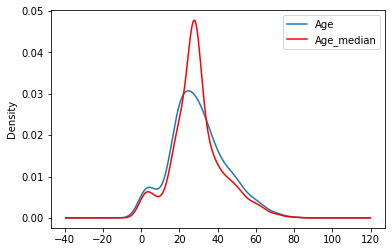

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages And Disadvantages of Mean/Median Imputation
- Advantages
  - Easy to implement(Robust to outliers)
  - Faster way to obtain the complete dataset
- Disadvantages
  - Change or Distortion in the original variance
  - Impacts Correlation

# 2} Random Sample Imputation
- Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

- When should it be used? 
  - It assumes that the data are missing completely at random(MCAR)

In [19]:
df['Age'].isnull().sum()

177

In [20]:
df["Age"].isnull().mean()*100

19.865319865319865

In [21]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [22]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [23]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [24]:
median=df.Age.median()
median

28.0

In [25]:
impute_nan(df,"Age",median)

In [26]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


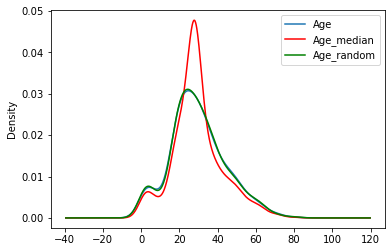

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages
   - Easy To implement
   - There is less distortion in variance
   
# Disadvantage
   - Every situation randomness won't work

# 3} Capturing NAN values with a new feature
 - It works well if the data are not missing completely at random

In [28]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [29]:
df.head()

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0


In [30]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [31]:
df.head(15)

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
5,0,28.0,8.4583,28.0,28.0,1
6,0,54.0,51.8625,54.0,54.0,0
7,0,2.0,21.0750,2.0,2.0,0
8,1,27.0,11.1333,27.0,27.0,0
9,1,14.0,30.0708,14.0,14.0,0


# Advantages
 - Easy to implement
 - Captures the importance of missing values
 
# Disadvantages
 - Creating Additional Features(Curse of Dimensionality)

# 4} End of Distribution imputation

<AxesSubplot:>

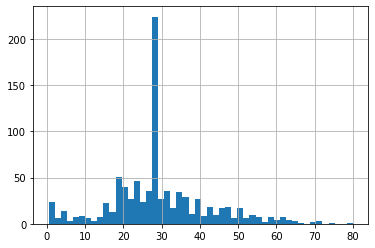

In [32]:
df.Age.hist(bins=50)

In [33]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

68.42067214450208

<AxesSubplot:xlabel='Age'>

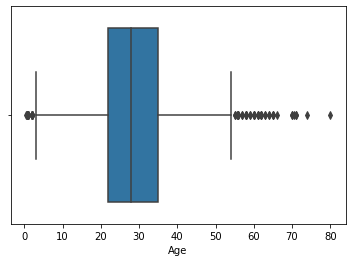

In [34]:
sns.boxplot('Age',data=df)

In [35]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [36]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [37]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random,Age_NAN,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0,0,22.0
1,1,38.0,71.2833,38.0,38.0,0,38.0
2,1,26.0,7.9250,26.0,26.0,0,26.0
3,1,35.0,53.1000,35.0,35.0,0,35.0
4,0,35.0,8.0500,35.0,35.0,0,35.0
5,0,28.0,8.4583,28.0,28.0,1,28.0
6,0,54.0,51.8625,54.0,54.0,0,54.0
7,0,2.0,21.0750,2.0,2.0,0,2.0
8,1,27.0,11.1333,27.0,27.0,0,27.0
9,1,14.0,30.0708,14.0,14.0,0,14.0


<AxesSubplot:>

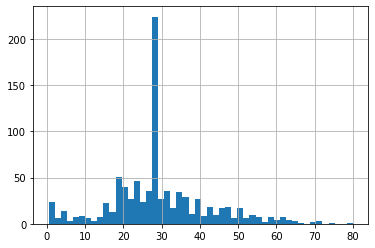

In [38]:
df['Age'].hist(bins=50)

<AxesSubplot:>

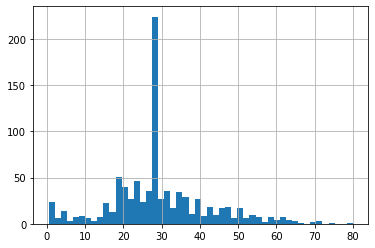

In [39]:
df['Age_end_distribution'].hist(bins=50)

<AxesSubplot:xlabel='Age_end_distribution'>

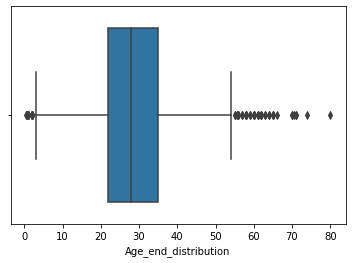

In [40]:
sns.boxplot('Age_end_distribution',data=df)

# 5} Arbitrary Value Imputation
- this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

<AxesSubplot:>

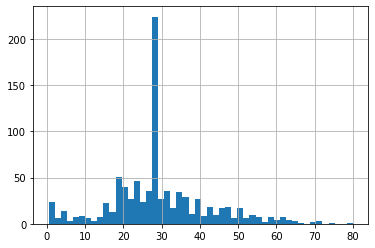

In [41]:
df['Age'].hist(bins=50)

In [42]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

# Advantages
- Easy to implement
- Captures the importance of missingess if there is one

# Disadvantages
- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

In [43]:
impute_nan(df,'Age')

In [44]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random,Age_NAN,Age_end_distribution,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0,0,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,0,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,0,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,0,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,0,35.0,35.0,35.0
5,0,28.0,8.4583,28.0,28.0,1,28.0,28.0,28.0
6,0,54.0,51.8625,54.0,54.0,0,54.0,54.0,54.0
7,0,2.0,21.0750,2.0,2.0,0,2.0,2.0,2.0
8,1,27.0,11.1333,27.0,27.0,0,27.0,27.0,27.0
9,1,14.0,30.0708,14.0,14.0,0,14.0,14.0,14.0


# How To Handle Categroical Missing Values
## 1} Frequent Category Imputation

In [45]:
df = pd.read_csv("houseprice.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [46]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [47]:
df = pd.read_csv("houseprice.csv", usecols = ["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [49]:
df.isnull().sum(),df.isnull().mean(),df.isnull().mean()*100

(BsmtQual        37
 FireplaceQu    690
 GarageType      81
 SalePrice        0
 dtype: int64,
 BsmtQual       0.025342
 FireplaceQu    0.472603
 GarageType     0.055479
 SalePrice      0.000000
 dtype: float64,
 BsmtQual        2.534247
 FireplaceQu    47.260274
 GarageType      5.547945
 SalePrice       0.000000
 dtype: float64)

In [50]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [51]:
df.isnull().mean().sort_values(ascending = True)*100

SalePrice       0.000000
BsmtQual        2.534247
GarageType      5.547945
FireplaceQu    47.260274
dtype: float64

- Since, the "BsmtQual" and "GarageType" containing less(5%) number of missing data.
- Therefore, we can replace these missing values with the most frequent values from the perticular feature or we can use mode.
- This method never impact the relationship of the data.

In [52]:
df.shape

(1460, 4)

# 2} Compute the frequency with every features

In [53]:
df.groupby(["BsmtQual"])["BsmtQual"].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [54]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

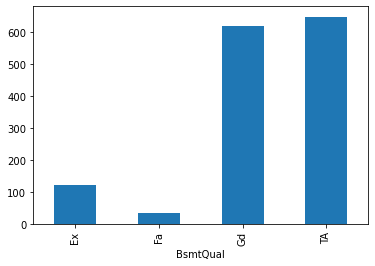

In [55]:
df.groupby(["BsmtQual"])["BsmtQual"].count().plot.bar()

<AxesSubplot:>

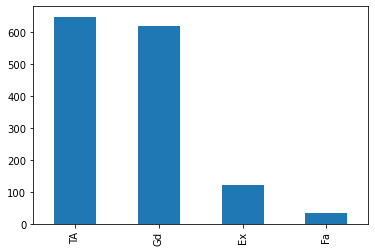

In [56]:
df["BsmtQual"].value_counts().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

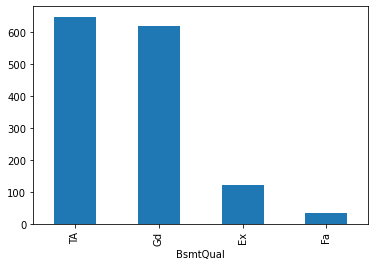

In [57]:
df.groupby(["BsmtQual"])["BsmtQual"].count().sort_values(ascending = False).plot.bar()

<AxesSubplot:xlabel='GarageType'>

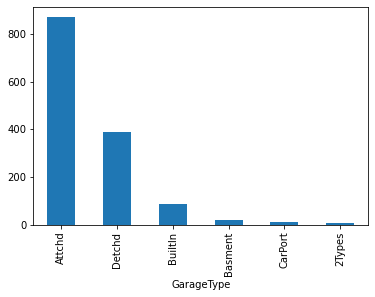

In [58]:
df.groupby(["GarageType"])["GarageType"].count().sort_values(ascending = False).plot.bar()

<AxesSubplot:>

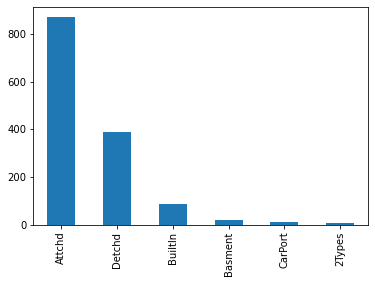

In [59]:
df["GarageType"].value_counts().plot.bar()

<AxesSubplot:>

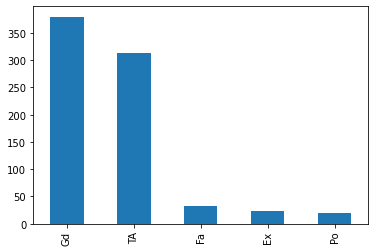

In [60]:
df["FireplaceQu"].value_counts().plot.bar()

In [61]:
df["FireplaceQu"].value_counts().index[0]

'Gd'

In [62]:
df["GarageType"].value_counts().index[0]

'Attchd'

In [63]:
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace = True)

In [64]:
impute_nan(df, "GarageType")

In [65]:
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(df, feature)

In [66]:
df.head(15)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [67]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

## Mode can also be used

In [68]:
df["GarageType"].mode()

0    Attchd
dtype: object

In [69]:
df["GarageType"].mode()[0]

'Attchd'

In [70]:
def impute_nan(df, variable):
    most_frequent_category = df[variable].mode().index[0]
    df[variable].fillna(most_frequent_category, inplace = True)

In [71]:
impute_nan(df, "GarageType")

In [72]:
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(df, feature)

- Since we are replacing the missing value with most frequent observation data or mode for that perticular feature.
- it has some disadvantages associated with this. 
- Beacause in "FireplaceQu" feature contain more than 47% of the missing data point.
- So it will distorts the relationship of the most frequent observation(category) with sales price(dependent variable). So this is the disadvantages with the feature having large missing data point.

# Advantages
- Easy To implement
- Fater way to implement

# Disadvantages
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
- It distorts the relation of the most frequent label

## Adding a variable to capture NAN

In [73]:
df1 = pd.read_csv("houseprice.csv", usecols = ["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df1

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [74]:
df1['BsmtQual_Var']=np.where(df1['BsmtQual'].isnull(),1,0)

In [75]:
df1.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [76]:
df1['BsmtQual'].mode()

0    TA
dtype: object

In [77]:
frequent = df1['BsmtQual'].mode()[0]
frequent

'TA'

In [78]:
df1.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [79]:
df1['BsmtQual_Var']=np.where(df1['BsmtQual'].isnull(),1,0)
frequent=df1['BsmtQual'].mode()[0]
df1['BsmtQual'].fillna(frequent,inplace=True)

In [80]:
df1.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [81]:
df1.tail(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
1450,Gd,NaN,NaN,136000,0
1451,Gd,Gd,Attchd,287090,0
1452,Gd,NaN,Basment,145000,0
1453,Gd,NaN,NaN,84500,0
1454,Gd,NaN,Attchd,185000,0
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,NaN,Attchd,142125,0
1459,TA,NaN,Attchd,147500,0


In [82]:
df1['FireplaceQu_Var']=np.where(df1['FireplaceQu'].isnull(),1,0)
frequent=df1['FireplaceQu'].mode()[0]
df1['FireplaceQu'].fillna(frequent,inplace=True)

In [83]:
df1.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,0,1
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


In [84]:
df1.tail(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
1450,Gd,Gd,NaN,136000,0,1
1451,Gd,Gd,Attchd,287090,0,0
1452,Gd,Gd,Basment,145000,0,1
1453,Gd,Gd,NaN,84500,0,1
1454,Gd,Gd,Attchd,185000,0,1
1455,Gd,TA,Attchd,175000,0,0
1456,Gd,TA,Attchd,210000,0,0
1457,TA,Gd,Attchd,266500,0,0
1458,TA,Gd,Attchd,142125,0,1
1459,TA,Gd,Attchd,147500,0,1


# Suppose if you have more frequent categories, we just replace NAN with a new category

In [85]:
df2 = pd.read_csv("houseprice.csv", usecols = ["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df2

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [86]:
def impute_nan(df,variable):
    df2[variable+"newvar"]=np.where(df2[variable].isnull(),"Missing",df2[variable])

In [87]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df2,feature)

In [88]:
df2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [89]:
final_df=df2.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
final_df

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


# Handle Categorical Features
## One Hot Encoding

In [90]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])
df

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [91]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [92]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [93]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])
df

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [94]:
df["Embarked"].nunique()

3

In [95]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [96]:
pd.get_dummies(df).head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [97]:
pd.get_dummies(df,drop_first= True).head(10)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


## Onehotencoding with many categories in a feature

In [98]:
df=pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])
df.head(10)

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
5,t,b,e,c,d,g,h
6,al,r,e,f,d,f,h
7,o,l,as,f,d,f,j
8,w,s,as,e,d,f,i
9,j,b,aq,c,d,f,a


In [99]:
for i in df.columns:
    print(i ,':',len(df[i].unique()))

X0 : 47
X1 : 27
X2 : 44
X3 : 7
X4 : 4
X5 : 29
X6 : 12


In [100]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [101]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [102]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [103]:
lst_10.append('X1')

In [104]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


# Ordinal Number Encoding

In [105]:
import datetime

In [106]:
today_date=datetime.datetime.today()
today_date

datetime.datetime(2022, 7, 1, 18, 39, 5, 760059)

In [107]:
today_date-datetime.timedelta(3) #timedelta(3) give us the diffrance of number of days mentioned in the bracket

datetime.datetime(2022, 6, 28, 18, 39, 5, 760059)

In [108]:
#### List Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)] # Here "x" is number of days 
days

[datetime.datetime(2022, 7, 1, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 30, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 29, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 28, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 27, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 26, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 25, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 24, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 23, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 22, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 21, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 20, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 19, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 18, 18, 39, 5, 760059),
 datetime.datetime(2022, 6, 17, 18, 39, 5, 760059)]

In [109]:
data = pd.DataFrame(days)
data.columns = ["Day"]

In [110]:
data.head(10)

,Day
0,2022-07-01 18:39:05.760059
1,2022-06-30 18:39:05.760059
2,2022-06-29 18:39:05.760059
3,2022-06-28 18:39:05.760059
4,2022-06-27 18:39:05.760059
5,2022-06-26 18:39:05.760059
6,2022-06-25 18:39:05.760059
7,2022-06-24 18:39:05.760059
8,2022-06-23 18:39:05.760059
9,2022-06-22 18:39:05.760059


In [111]:
data["Week_days"] = data["Day"].dt.day
data.head(10)

,Day,Week_days
0,2022-07-01 18:39:05.760059,1
1,2022-06-30 18:39:05.760059,30
2,2022-06-29 18:39:05.760059,29
3,2022-06-28 18:39:05.760059,28
4,2022-06-27 18:39:05.760059,27
5,2022-06-26 18:39:05.760059,26
6,2022-06-25 18:39:05.760059,25
7,2022-06-24 18:39:05.760059,24
8,2022-06-23 18:39:05.760059,23
9,2022-06-22 18:39:05.760059,22


In [112]:
data["Day"].dt.week

0     26
1     26
2     26
3     26
4     26
5     25
6     25
7     25
8     25
9     25
10    25
11    25
12    24
13    24
14    24
Name: Day, dtype: int64

In [113]:
data["Week_days_name"] = data["Day"].dt.name
data.head(10)

,Day,Week_days,Week_days_name
0,2022-07-01 18:39:05.760059,1,Day
1,2022-06-30 18:39:05.760059,30,Day
2,2022-06-29 18:39:05.760059,29,Day
3,2022-06-28 18:39:05.760059,28,Day
4,2022-06-27 18:39:05.760059,27,Day
5,2022-06-26 18:39:05.760059,26,Day
6,2022-06-25 18:39:05.760059,25,Day
7,2022-06-24 18:39:05.760059,24,Day
8,2022-06-23 18:39:05.760059,23,Day
9,2022-06-22 18:39:05.760059,22,Day


In [114]:
data["Year"] = data["Day"].dt.year
data.head(10)

,Day,Week_days,Week_days_name,Year
0,2022-07-01 18:39:05.760059,1,Day,2022
1,2022-06-30 18:39:05.760059,30,Day,2022
2,2022-06-29 18:39:05.760059,29,Day,2022
3,2022-06-28 18:39:05.760059,28,Day,2022
4,2022-06-27 18:39:05.760059,27,Day,2022
5,2022-06-26 18:39:05.760059,26,Day,2022
6,2022-06-25 18:39:05.760059,25,Day,2022
7,2022-06-24 18:39:05.760059,24,Day,2022
8,2022-06-23 18:39:05.760059,23,Day,2022
9,2022-06-22 18:39:05.760059,22,Day,2022


In [115]:
data["Months"] = data["Day"].dt.month
data.head(10)

,Day,Week_days,Week_days_name,Year,Months
0,2022-07-01 18:39:05.760059,1,Day,2022,7
1,2022-06-30 18:39:05.760059,30,Day,2022,6
2,2022-06-29 18:39:05.760059,29,Day,2022,6
3,2022-06-28 18:39:05.760059,28,Day,2022,6
4,2022-06-27 18:39:05.760059,27,Day,2022,6
5,2022-06-26 18:39:05.760059,26,Day,2022,6
6,2022-06-25 18:39:05.760059,25,Day,2022,6
7,2022-06-24 18:39:05.760059,24,Day,2022,6
8,2022-06-23 18:39:05.760059,23,Day,2022,6
9,2022-06-22 18:39:05.760059,22,Day,2022,6


In [116]:
data["Hours"] = data["Day"].dt.hour
data.head(10)

,Day,Week_days,Week_days_name,Year,Months,Hours
0,2022-07-01 18:39:05.760059,1,Day,2022,7,18
1,2022-06-30 18:39:05.760059,30,Day,2022,6,18
2,2022-06-29 18:39:05.760059,29,Day,2022,6,18
3,2022-06-28 18:39:05.760059,28,Day,2022,6,18
4,2022-06-27 18:39:05.760059,27,Day,2022,6,18
5,2022-06-26 18:39:05.760059,26,Day,2022,6,18
6,2022-06-25 18:39:05.760059,25,Day,2022,6,18
7,2022-06-24 18:39:05.760059,24,Day,2022,6,18
8,2022-06-23 18:39:05.760059,23,Day,2022,6,18
9,2022-06-22 18:39:05.760059,22,Day,2022,6,18


In [117]:
data["Minutes"] = data["Day"].dt.minute
data.head(10)

,Day,Week_days,Week_days_name,Year,Months,Hours,Minutes
0,2022-07-01 18:39:05.760059,1,Day,2022,7,18,39
1,2022-06-30 18:39:05.760059,30,Day,2022,6,18,39
2,2022-06-29 18:39:05.760059,29,Day,2022,6,18,39
3,2022-06-28 18:39:05.760059,28,Day,2022,6,18,39
4,2022-06-27 18:39:05.760059,27,Day,2022,6,18,39
5,2022-06-26 18:39:05.760059,26,Day,2022,6,18,39
6,2022-06-25 18:39:05.760059,25,Day,2022,6,18,39
7,2022-06-24 18:39:05.760059,24,Day,2022,6,18,39
8,2022-06-23 18:39:05.760059,23,Day,2022,6,18,39
9,2022-06-22 18:39:05.760059,22,Day,2022,6,18,39


In [118]:
df = data.iloc[:,0:1]
df.head(10)

,Day
0,2022-07-01 18:39:05.760059
1,2022-06-30 18:39:05.760059
2,2022-06-29 18:39:05.760059
3,2022-06-28 18:39:05.760059
4,2022-06-27 18:39:05.760059
5,2022-06-26 18:39:05.760059
6,2022-06-25 18:39:05.760059
7,2022-06-24 18:39:05.760059
8,2022-06-23 18:39:05.760059
9,2022-06-22 18:39:05.760059


In [119]:
df = data.iloc[:,0:2]
df.head(10)

,Day,Week_days
0,2022-07-01 18:39:05.760059,1
1,2022-06-30 18:39:05.760059,30
2,2022-06-29 18:39:05.760059,29
3,2022-06-28 18:39:05.760059,28
4,2022-06-27 18:39:05.760059,27
5,2022-06-26 18:39:05.760059,26
6,2022-06-25 18:39:05.760059,25
7,2022-06-24 18:39:05.760059,24
8,2022-06-23 18:39:05.760059,23
9,2022-06-22 18:39:05.760059,22


## Count Or Frequency Encoding

In [120]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()                                                         

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [121]:
columns=[1,3,5,6,7,8,9,13]

In [122]:
train_set=train_set[columns]

In [123]:
train_set

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [124]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [125]:
train_set.head(10)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [126]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [127]:
train_set['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [128]:
train_set['Country'].value_counts().to_dict()

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [129]:
country_map=train_set['Country'].value_counts().to_dict()

In [130]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


# Advantages
- Easy To Use
- Not increasing feature space

# Disadvantages
- It will provide same weight if the frequencies are same

# Target Guided Ordinal Encoding
- Ordering the labels according to the target
- Replace the labels by the joint probability of being 1 or 0

In [131]:
df=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Cabin     204 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


In [133]:
df.isnull().sum()

Survived      0
Cabin       687
dtype: int64

In [134]:
df['Cabin'].fillna('Missing',inplace=True)

In [135]:
df.head(10)

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
5,0,Missing
6,0,E46
7,0,Missing
8,1,Missing
9,1,Missing


In [136]:
df['Cabin']=df['Cabin'].astype(str).str[0] # str[0] is used in order to extract first wpord from the perticular string

In [137]:
df['Cabin']

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [138]:
df.head(10)

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
5,0,M
6,0,E
7,0,M
8,1,M
9,1,M


In [139]:
df["Cabin"].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [140]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [141]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [142]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [143]:
enumerate(ordinal_labels,0) # it is an iterable function

In [144]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [145]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head(10)

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1
5,0,M,1
6,0,E,7
7,0,M,1
8,1,M,1
9,1,M,1


# Mean Encoding

In [146]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [147]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


# Probability Ratio Encoding
- Probability of Survived based on Cabin--- Categorical Feature
- Probability of Not Survived---1-pr(Survived)
- pr(Survived)/pr(Not Survived)
- Dictonary to map cabin with probability
- replace with the categorical feature

In [148]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [149]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [150]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [151]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [152]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [153]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [154]:
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [155]:
prob_df['Died']=1-prob_df['Survived']

In [156]:
prob_df.head(10)

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [157]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [158]:
probability_encoded=prob_df['Probability_ratio'].to_dict()
probability_encoded

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [159]:
df['Cabin_encoded']=df['Cabin'].map(probability_encoded)
df.head(15)

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274
